# Clustering of all gastruloid data

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import scanpy as sc
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mplx
from anndata import AnnData, read_h5ad
import singlecellmultiomics.bamProcessing.bamToRNACounts

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()

/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_69295/2452997345.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [5]:
sc.settings.set_figure_params(dpi=100)



# Load the dataset

In [3]:
pathToData = '/Users/m.blotenburg/Documents/Projects/Mouse_Scartrace/Data_analysis/Transcriptome_analysis/120hAA/20190904_CS2pipeOutput_RNAVelocity_VAN2663_VAN2703_VAN2806_VAN3423_OUD3693/CS2pipe_datasets/120hAA/'

In [4]:
df120 = pd.read_pickle('20201019_gastruloids_allPlates.pickle.gz')

In [6]:
results_file = './20230220dataset120hAA.h5ad'  # the file that will store the analysis results

In [6]:
df120.head()

1_1.Gast_con6_D1  1_10.Gast_con6_D1  1_100.Gast_con6_D1  \
ENSMUSG00000033845_1               5.0                1.0                 4.0   
ENSMUSG00000025903_1               1.0                2.0                 4.0   
ENSMUSG00000033813_1               2.0                7.0                 7.0   
ENSMUSG00000033793_1               NaN                NaN                 NaN   
ENSMUSG00000025907_1               NaN                NaN                 1.0   

                      1_101.Gast_con6_D1  1_102.Gast_con6_D1  \
ENSMUSG00000033845_1                 2.0                 1.0   
ENSMUSG00000025903_1                 NaN                 1.0   
ENSMUSG00000033813_1                 4.0                 3.0   
ENSMUSG00000033793_1                 1.0                 1.0   
ENSMUSG00000025907_1                 2.0                 1.0   

                      1_103.Gast_con6_D1  1_104.Gast_con6_D1  \
ENSMUSG00000033845_1                 NaN                 NaN   
ENSMUSG00000025903_1                 NaN                 NaN   
ENSMUSG00000033813_1                 NaN                 NaN   
ENSMUSG00000033793_1                 1.0                 NaN   
ENSMUSG00000025907_1                 NaN                 NaN   

                      1_105.Gast_con6_D1  1_106.Gast_con6_D1  \
ENSMUSG00000033845_1                 2.0                 NaN   
ENSMUSG00000025903_1                 1.0                 2.0   
ENSMUSG00000033813_1                 1.0                 3.0   
ENSMUSG00000033793_1                 1.0                 NaN   
ENSMUSG00000025907_1                 NaN                 3.0   

                      1_107.Gast_con6_D1  ...  15_90.Gast_con6_H2  \
ENSMUSG00000033845_1                 2.0  ...                 NaN   
ENSMUSG00000025903_1                 3.0  ...                 2.0   
ENSMUSG00000033813_1                 4.0  ...                 1.0   
ENSMUSG00000033793_1                 1.0  ...                 NaN   
ENSMUSG00000025907_1                 1.0  ...                 1.0   

                      15_91.Gast_con6_H2  15_92.Gast_con6_H2  \
ENSMUSG00000033845_1                 3.0                 NaN   
ENSMUSG00000025903_1                 NaN                 1.0   
ENSMUSG00000033813_1                 3.0                 2.0   
ENSMUSG00000033793_1                 NaN                 4.0   
ENSMUSG00000025907_1                 NaN                 3.0   

                      15_93.Gast_con6_H2  15_94.Gast_con6_H2  \
ENSMUSG00000033845_1                 5.0                 1.0   
ENSMUSG00000025903_1                 3.0                 NaN   
ENSMUSG00000033813_1                 2.0                 NaN   
ENSMUSG00000033793_1                 NaN                 2.0   
ENSMUSG00000025907_1                 3.0                 2.0   

                      15_95.Gast_con6_H2  15_96.Gast_con6_H2  \
ENSMUSG00000033845_1                 NaN                 3.0   
ENSMUSG00000025903_1                 NaN                 NaN   
ENSMUSG00000033813_1                 1.0                 2.0   
ENSMUSG00000033793_1                 1.0                 NaN   
ENSMUSG00000025907_1                 1.0                 1.0   

                      15_97.Gast_con6_H2  15_98.Gast_con6_H2  \
ENSMUSG00000033845_1                 NaN                 NaN   
ENSMUSG00000025903_1                 NaN                 NaN   
ENSMUSG00000033813_1                 NaN                 1.0   
ENSMUSG00000033793_1                 NaN                 1.0   
ENSMUSG00000025907_1                 NaN                 NaN   

                      15_99.Gast_con6_H2  
ENSMUSG00000033845_1                 NaN  
ENSMUSG00000025903_1                 NaN  
ENSMUSG00000033813_1                 NaN  
ENSMUSG00000033793_1                 NaN  
ENSMUSG00000025907_1                 NaN  

[5 rows x 5754 columns]

In [9]:
df120 = df120.fillna(0)

In [10]:
print('Dataset 120hAA')
print(df120.shape)

Dataset 120hAA
(34604, 5754)


In [11]:
df120 = df120.loc[df120.index.dropna()]

In [12]:
df120 = df120.astype(float)

In [13]:
adata_120 = sc.AnnData(df120.transpose())

/var/folders/pb/hvc2shb53x194_v0c3h_jyccsf3dhb/T/ipykernel_12420/2491216084.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_120 = sc.AnnData(df120.transpose())


In [14]:
adata=adata_120

# Preprocessing of dataset 1 - 120h AA

make gene names more workable

In [15]:
adata.var.index = adata.var.index.str.split('_',0,expand=True)

In [16]:
adata.var.head()

Empty DataFrame
Columns: []
Index: [(ENSMUSG00000033845, 1), (ENSMUSG00000025903, 1), (ENSMUSG00000033813, 1), (ENSMUSG00000033793, 1), (ENSMUSG00000025907, 1)]

In [17]:
index = adata.var.reset_index(level=(1))
index = index.rename(index=str, columns={"level_1": "chromosome"})
index.head()

chromosome
ENSMUSG00000033845          1
ENSMUSG00000025903          1
ENSMUSG00000033813          1
ENSMUSG00000033793          1
ENSMUSG00000025907          1

In [18]:
index.index

Index(['ENSMUSG00000033845', 'ENSMUSG00000025903', 'ENSMUSG00000033813',
       'ENSMUSG00000033793', 'ENSMUSG00000025907', 'ENSMUSG00000061024',
       'ENSMUSG00000025911', 'ENSMUSG00000025912', 'ENSMUSG00000045210',
       'ENSMUSG00000025915',
       ...
       'ENSMUSG00000103521', 'ENSMUSG00000095569', 'ENSMUSG00000074945',
       'ENSMUSG00000080961', 'ENSMUSG00000088295', 'ENSMUSG00000089407',
       'ENSMUSG00000086821', 'ENSMUSG00000083527', 'ENSMUSG00000093338',
       'ENSMUSG00000051046'],
      dtype='object', length=34604)

In [19]:
index['ensembl'] = index.index

In [20]:
adata.var.index = index.index

In [21]:
adata.var['ensembl'] = index['ensembl']
adata.var['chromosome'] = index['chromosome']

In [22]:
conversion_table = singlecellmultiomics.bamProcessing.bamToRNACounts.get_gene_id_to_gene_name_conversion_table('/Users/m.blotenburg/Documents/Projects/TCHIC/data/jupyter_notebooks/QC/standard_files/exons.gtf.gz')

In [23]:
adata.var_names = np.array([conversion_table.get(x,x) for x in adata.var_names ])

In [24]:
adata.var_names_make_unique()

In [25]:
adata.var.head()

ensembl chromosome
Mrpl15   ENSMUSG00000033845          1
Lypla1   ENSMUSG00000025903          1
Tcea1    ENSMUSG00000033813          1
Atp6v1h  ENSMUSG00000033793          1
Rb1cc1   ENSMUSG00000025907          1

Show those genes that yield the highest fraction of counts in each single cells, across all cells.

normalizing counts per cell
    finished (0:00:00)


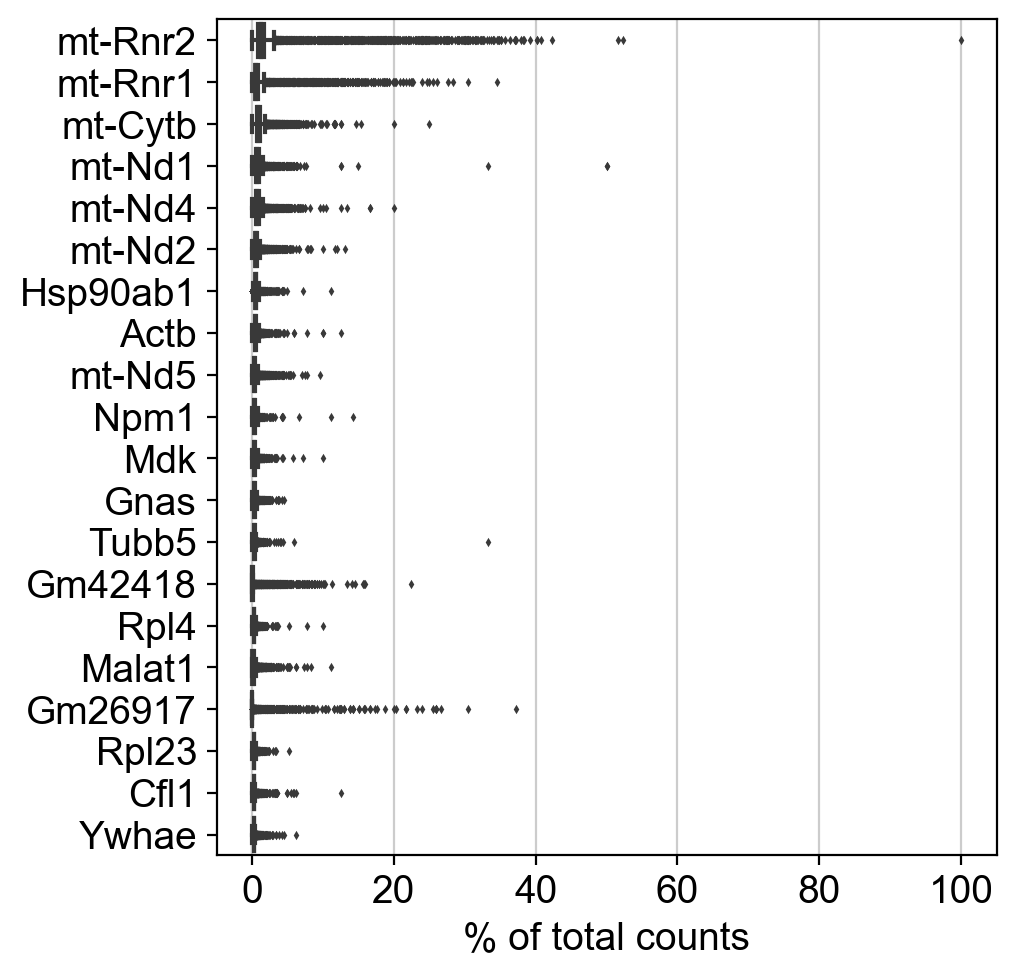

In [26]:
sc.pl.highest_expr_genes(adata, n_top=20)

Basic filtering.

In [27]:
adata

AnnData object with n_obs × n_vars = 5754 × 34604
    var: 'ensembl', 'chromosome'

In [28]:
adata.write(results_file)

# To load adata file with corrected gene names and continue:

In [29]:
adata = sc.read(results_file)

In [30]:
adata

AnnData object with n_obs × n_vars = 5754 × 34604
    var: 'ensembl', 'chromosome'

In [31]:
minCount = 500
sc.pp.filter_cells(adata, min_counts=minCount)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=2)

filtered out 1007 cells that have less than 500 counts
filtered out 5349 genes that are detected in less than 2 cells


Let us assemple some information about mitochondrial genes, which are important for quality control.

Citing from "Simple Single Cell" workflows [(Lun, McCarthy & Marioni, 2017)](https://master.bioconductor.org/packages/release/workflows/html/simpleSingleCell.html#examining-gene-level-metrics):

> High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), possibly because of loss of cytoplasmic RNA from perforated cells. The reasoning is that mitochondria are larger than individual transcript molecules and less likely to escape through tears in the cell membrane.

Note you can also use the function `pp.calculate_qc_metrics` to compute the fraction of mitochondrial genes and additional measures.

In [32]:
mito_genes = adata.var_names.str.startswith('mt-')

# for each cell compute fraction of counts in mito genes vs. all genes
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

A violin plot of the computed quality measures.

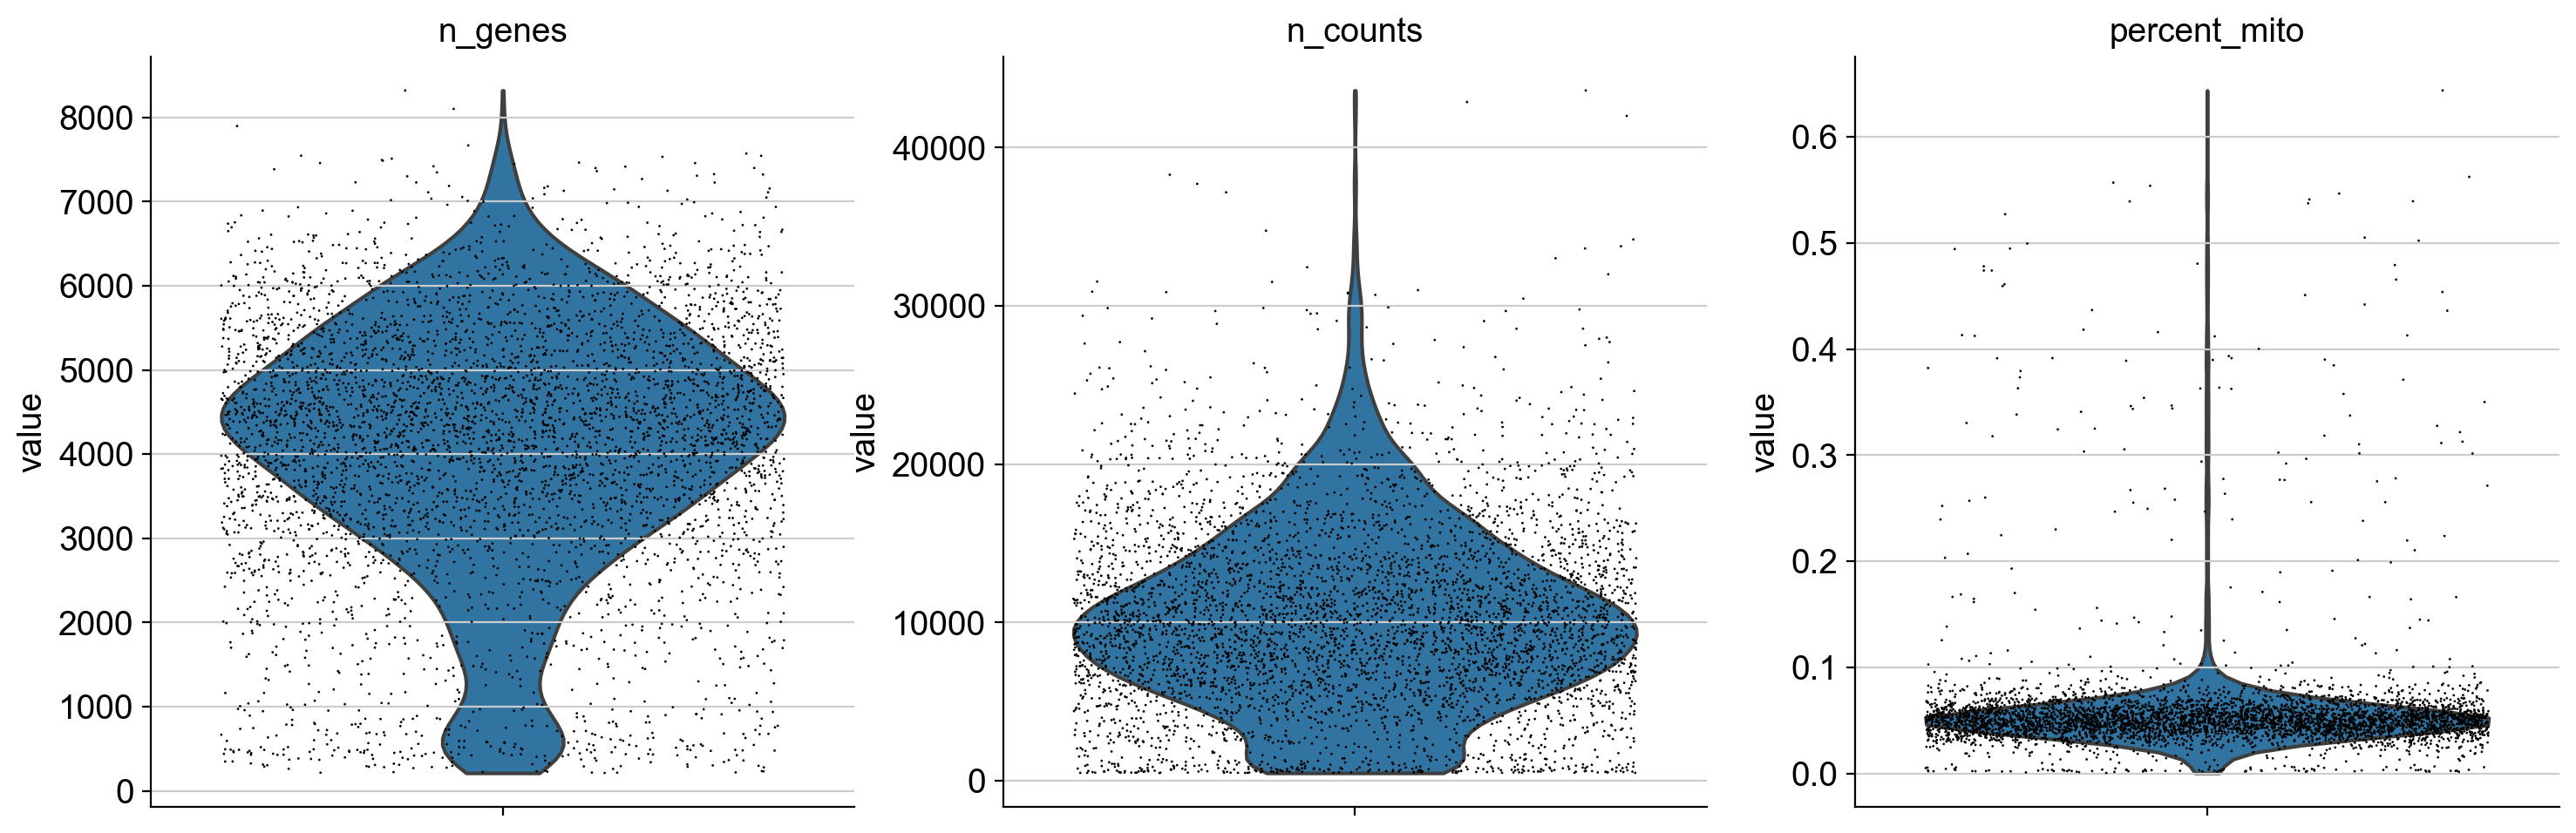

In [33]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

Remove cells that have too many mitochondrial genes expressed or too many total counts.

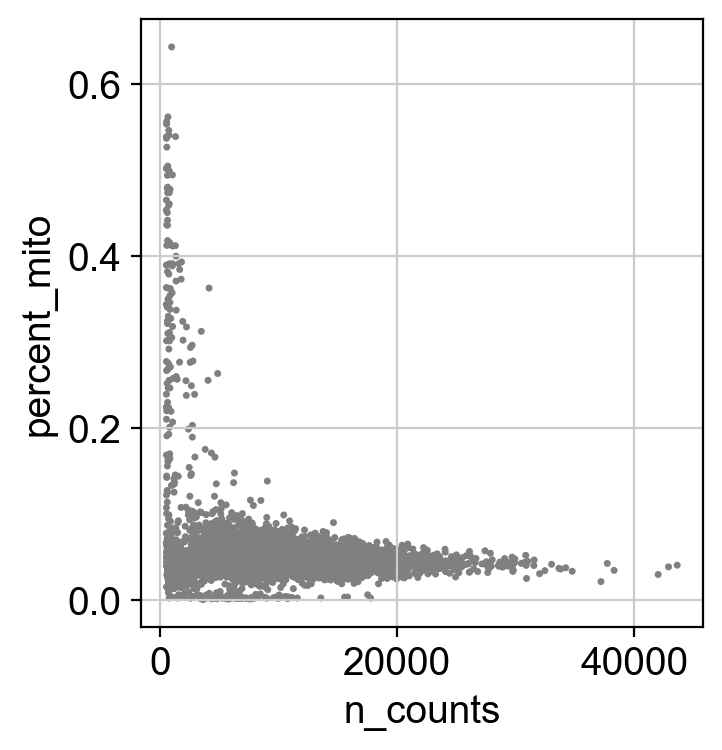

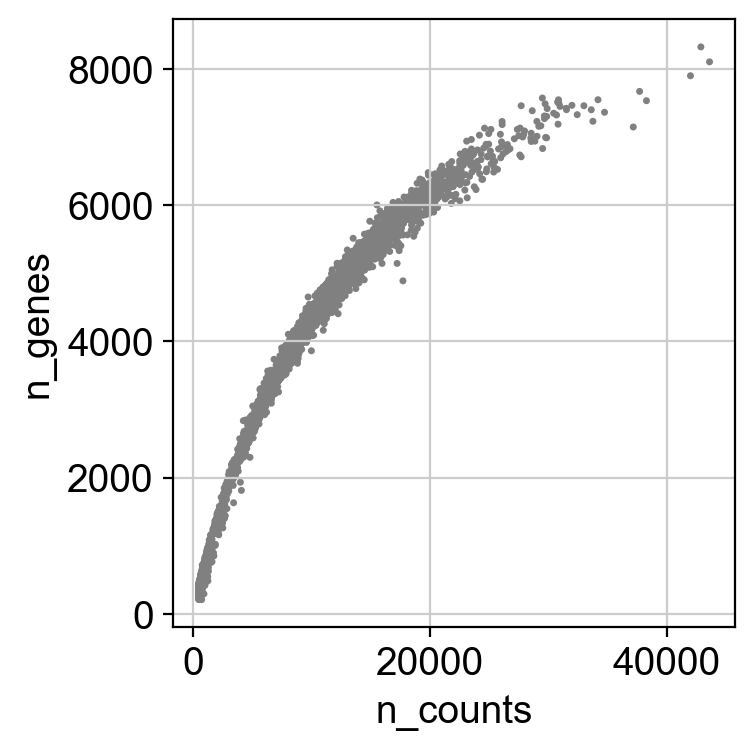

In [34]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

Actually do the filtering.

In [36]:
adata = adata[adata.obs['percent_mito'] < 0.2, :]

throw out any other unwanted genes

In [37]:
# removing genes with annotations we are not interested in
banned = ['NA', 'mt-', "Malat1", 'Rpl', 'Rps']
keptGenes = [geneName for geneName in adata.var.index if not any( (b in geneName for b in banned) )]

adata = adata[:,keptGenes]

adata

View of AnnData object with n_obs × n_vars = 4637 × 28856
    obs: 'n_counts', 'n_genes', 'percent_mito'
    var: 'ensembl', 'chromosome', 'n_cells'

minCount = 1000
sc.pp.filter_cells(adata, min_counts=minCount)
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=2)

Total-count normalize (library-size correct) the data matrix $\mathbf{X}$ to 10,000 reads per cell, so that counts become comparable among cells.

In [38]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=minCount)

normalizing by total count per cell


/Users/m.blotenburg/miniconda3/envs/conda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:524: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[key_n_counts] = counts_per_cell


    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


Logarithmize the data.

In [39]:
sc.pp.log1p(adata)

Set the `.raw` attribute of AnnData object to the logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object. While many people consider the normalized data matrix as the "relevant data" for visualization and differential testing, some would prefer to store the unnormalized data.

In [40]:
adata.raw = adata

Identify highly-variable genes.

In [41]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


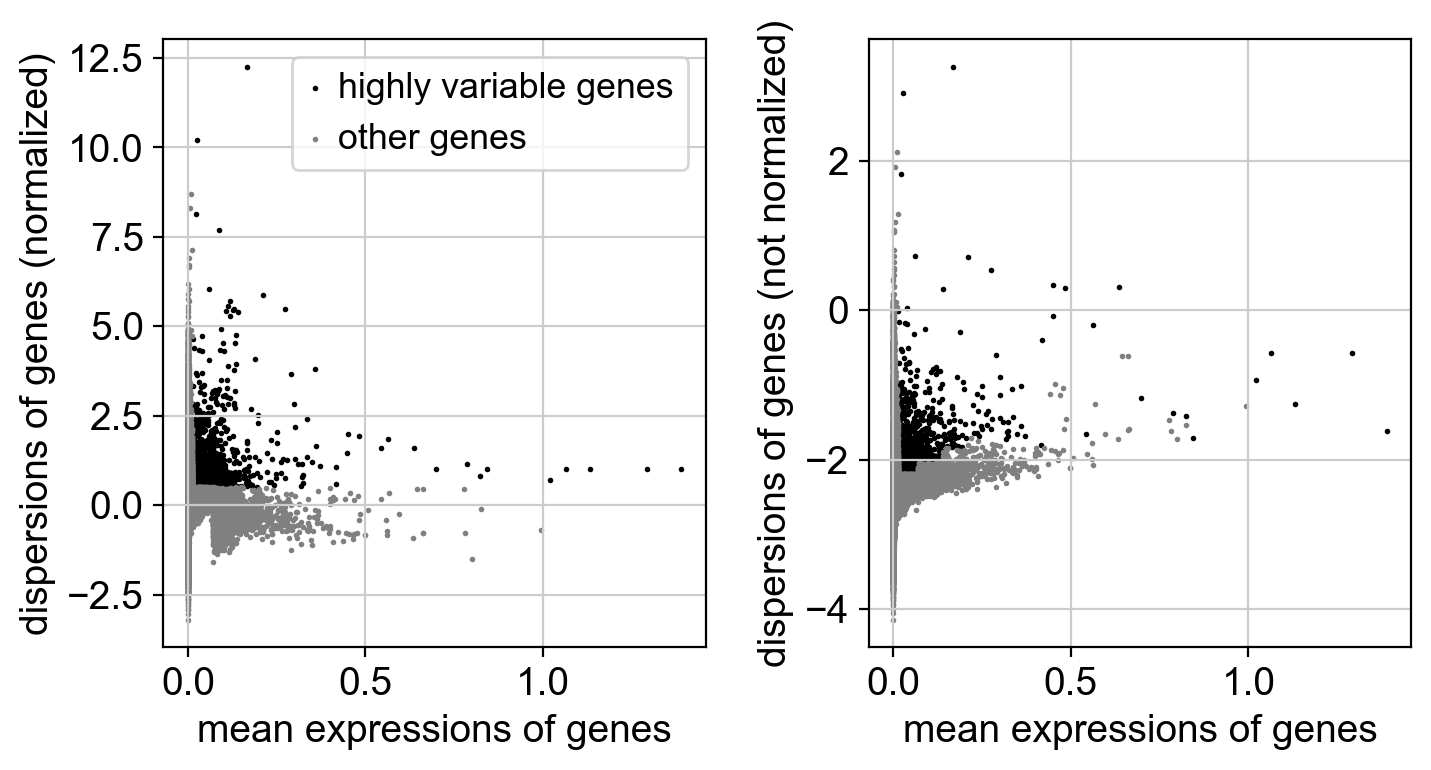

In [42]:
sc.pl.highly_variable_genes(adata)

Actually do the filtering.

In [43]:
#adata = adata[:, adata.var['highly_variable']]

In [44]:
all_cc_genes = read_csv('./regev_lab_cell_cycle_genes_mouse.csv', index_col=False)
cell_cycle_genes = [x.strip() for x in open('./regev_lab_cell_cycle_genes.txt')]
s_genes_h = cell_cycle_genes[:43]
g2m_genes_h = cell_cycle_genes[43:]
s_genes = list(all_cc_genes[all_cc_genes['HGNC.symbol'].isin(s_genes_h)]['MGI.symbol'])
g2m_genes = list(all_cc_genes[all_cc_genes['HGNC.symbol'].isin(g2m_genes_h)]['MGI.symbol'])

all_cell_cycle_genes = [x for x in list(all_cc_genes['MGI.symbol']) if x in adata.var_names]

In [45]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    278 total control genes are used. (0:00:01)
computing score 'G2M_score'


/Users/m.blotenburg/miniconda3/envs/conda/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


    finished: added
    'G2M_score', score of gene set (adata.obs).
    239 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/Users/m.blotenburg/miniconda3/envs/conda/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


computing PCA
    on highly variable genes
    with n_comps=34
    finished (0:00:00)


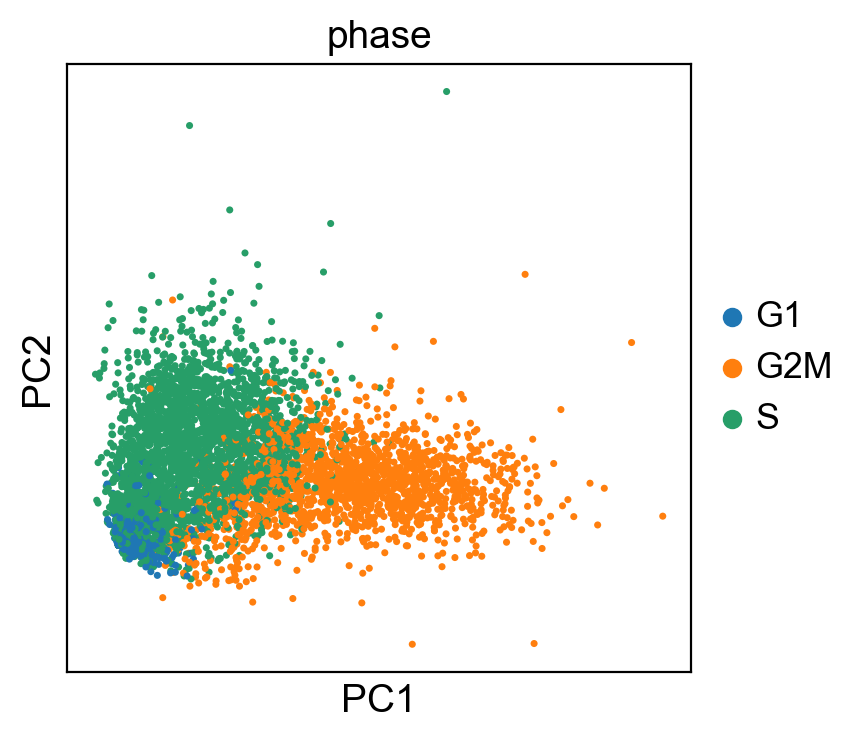

In [46]:
adata_cc_genes = adata[:, all_cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [47]:
sc.pp.regress_out(adata, ['S_score', 'G2M_score','n_counts', 'percent_mito'])
#sc.pp.scale(adata)

regressing out ['S_score', 'G2M_score', 'n_counts', 'percent_mito']
    finished (0:03:59)


computing PCA
    on highly variable genes
    with n_comps=34
    finished (0:00:00)


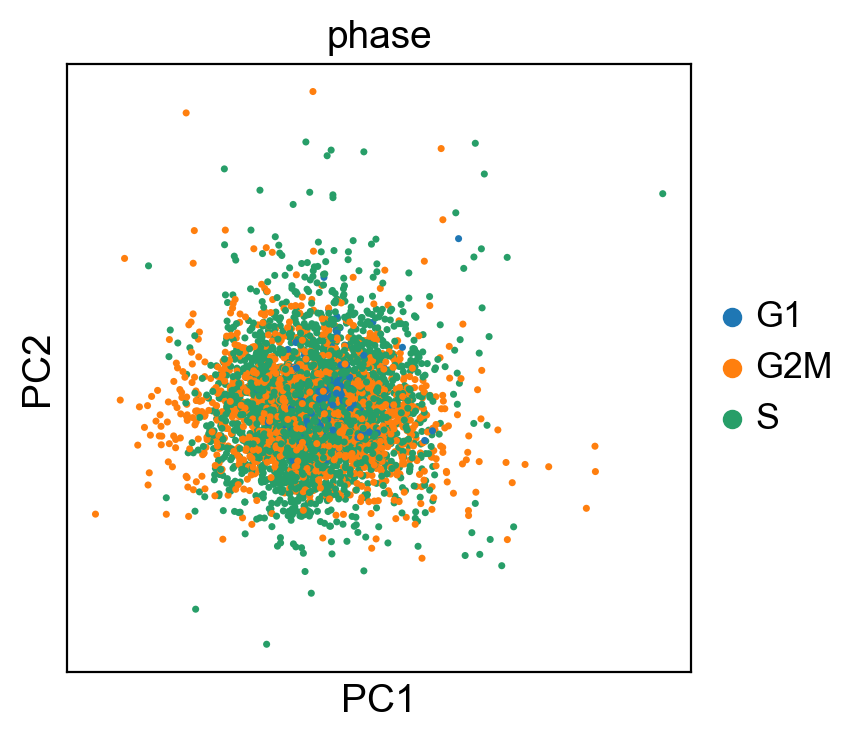

In [48]:
adata_cc_genes = adata[:, all_cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.

In [49]:
#sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

Scale each gene to unit variance. Clip values exceeding standard deviation 10. 

In [50]:
sc.pp.scale(adata, max_value=10)

normalizing counts per cell


/Users/m.blotenburg/miniconda3/envs/conda/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


    finished (0:00:01)


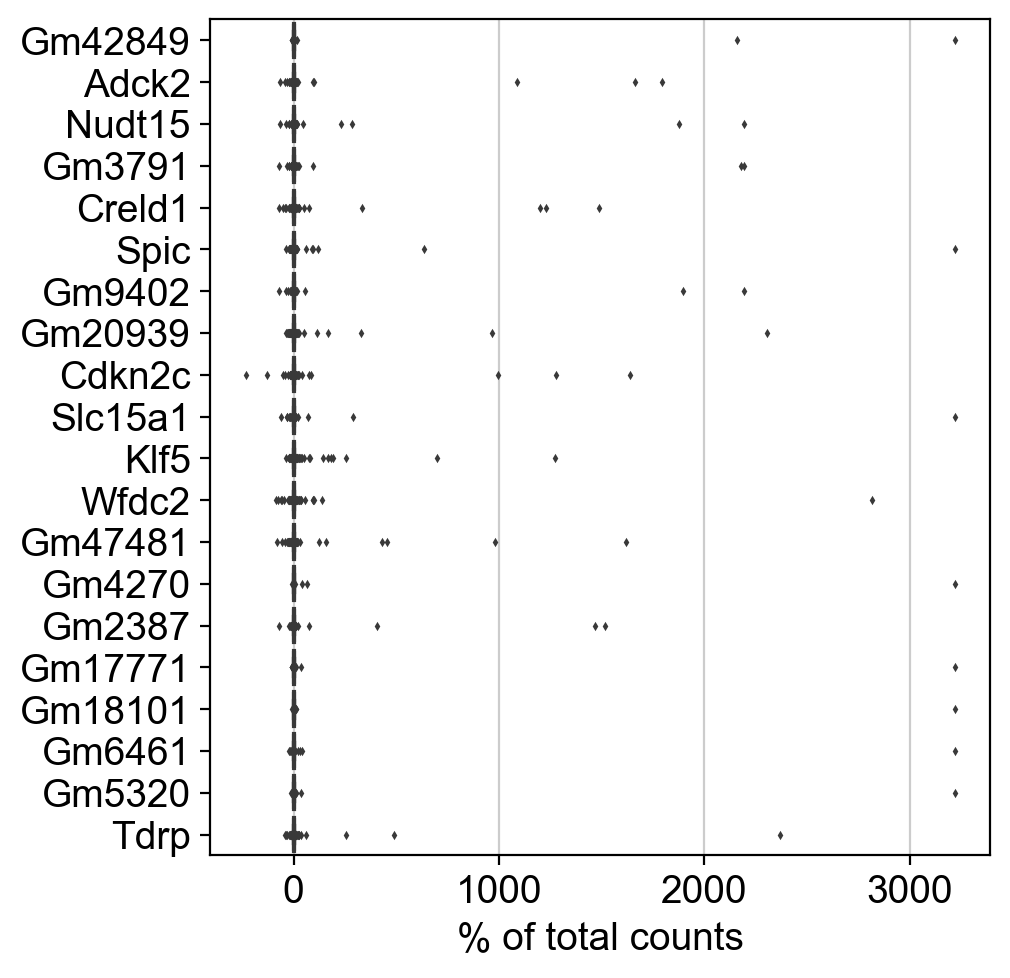

In [51]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [52]:
adata

AnnData object with n_obs × n_vars = 4637 × 28856
    obs: 'n_counts', 'n_genes', 'percent_mito', 'S_score', 'G2M_score', 'phase'
    var: 'ensembl', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

## Principal component analysis

Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.

In [53]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


We can make a scatter plot in the PCA coordinates, but we will not use that later on.

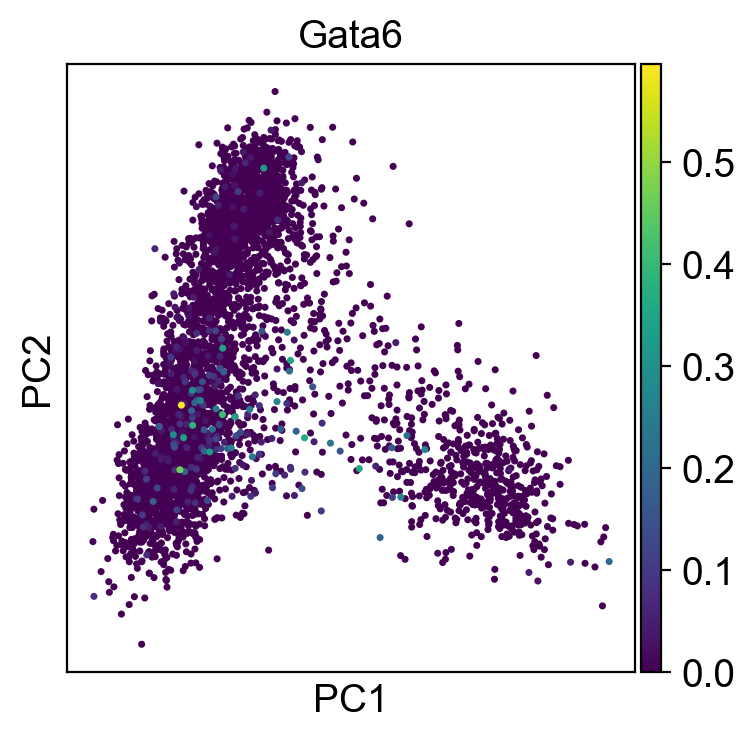

In [54]:
plotgene = [geneName for geneName in adata.var.index if any( (b in geneName for b in ['Gata6']) )]
sc.pl.pca(adata, color=plotgene)

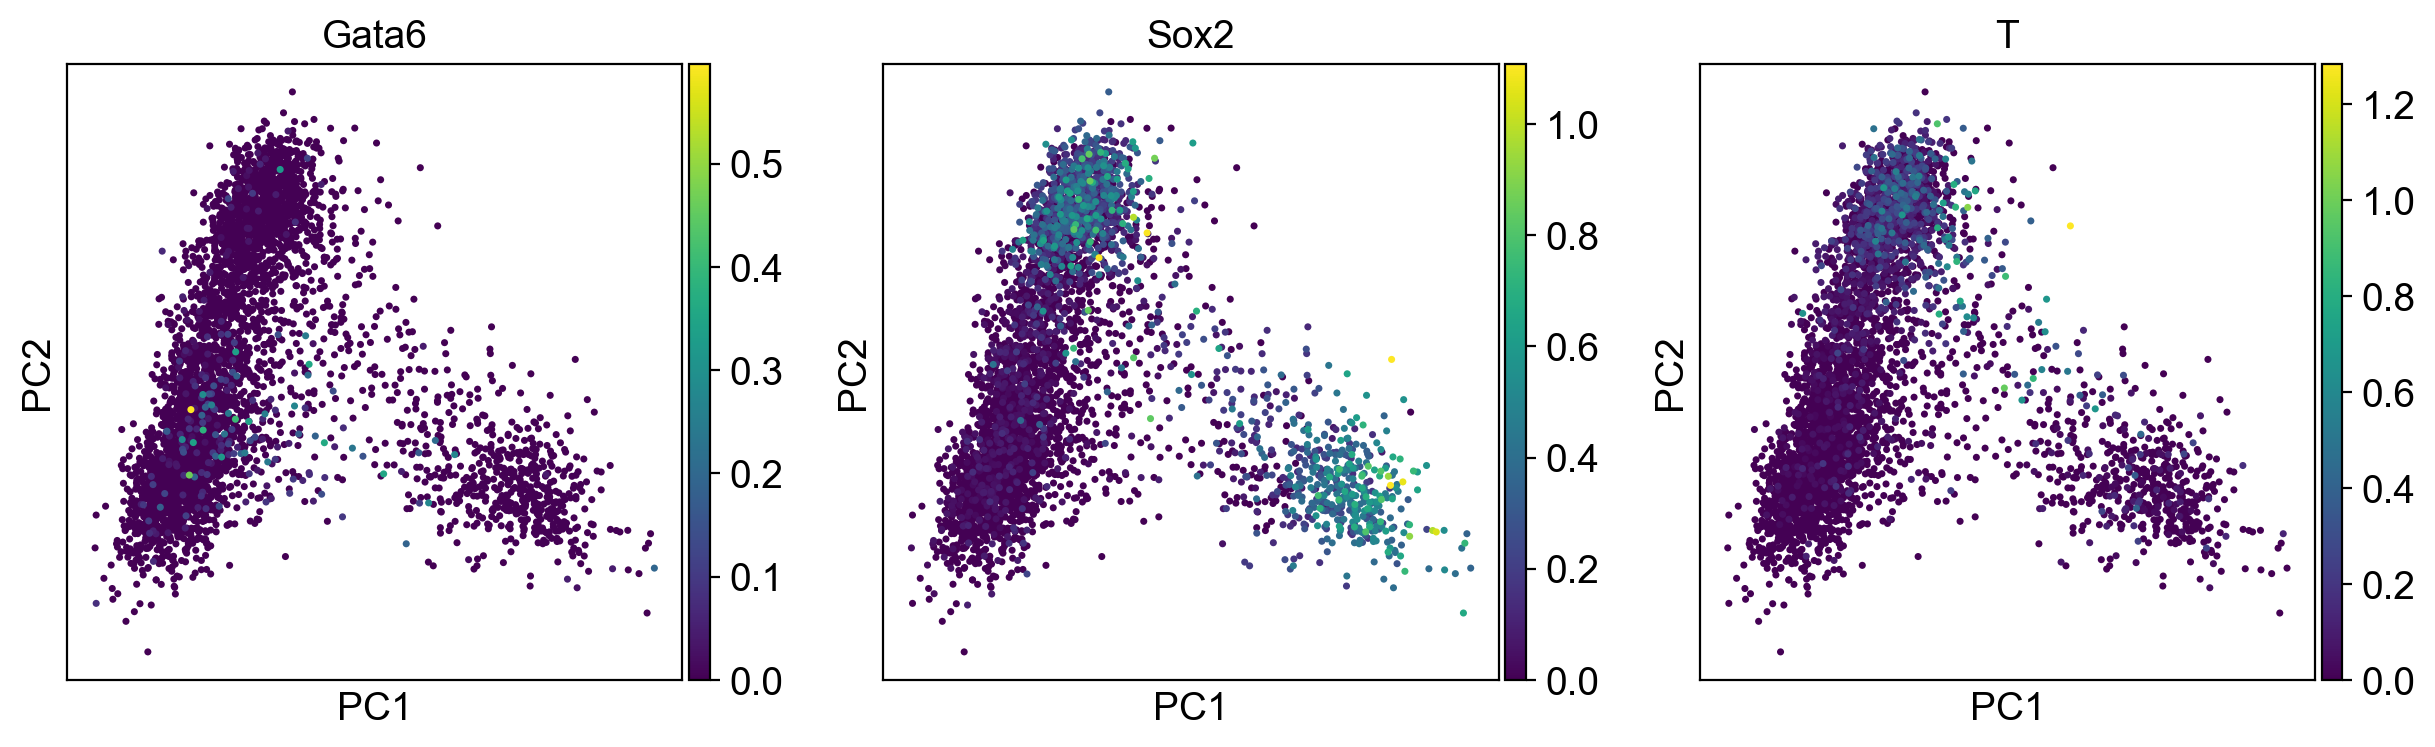

In [55]:
sc.pl.pca(adata, color=['Gata6','Sox2','T'])

Let us inspect the contribution of single PCs to the total variance in the data. This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`. In our experience, often, a rough estimate of the number of PCs does fine.

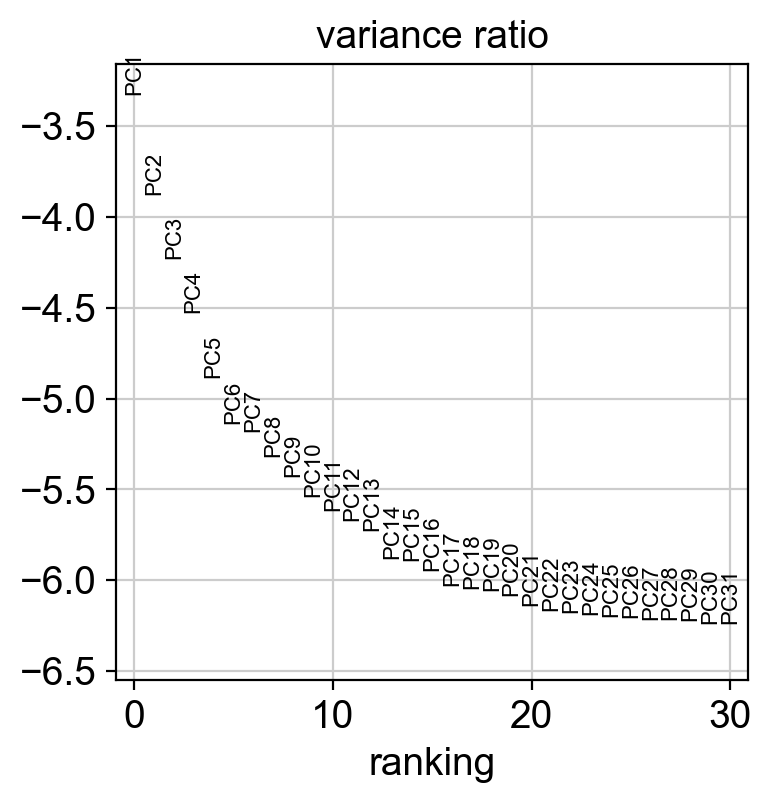

In [56]:
sc.pl.pca_variance_ratio(adata, log=True)

Save the result.

In [57]:
adata.write(results_file)

In [58]:
adata

AnnData object with n_obs × n_vars = 4637 × 28856
    obs: 'n_counts', 'n_genes', 'percent_mito', 'S_score', 'G2M_score', 'phase'
    var: 'ensembl', 'chromosome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

## Computing the neighborhood graph

Let us compute the neighborhood graph of cells using the PCA representation of the data matrix. You might simply use default values here. For the sake of reproducing Seurat's results, let's take the following values.

In [59]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40


/Users/m.blotenburg/miniconda3/envs/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)


## Embedding the neighborhood graph

We advertise embedding the graph in 2 dimensions using UMAP ([McInnes et al., 2018](https://arxiv.org/abs/1802.03426)), see below. It is  potentially more faithful to the global connectivity of the manifold than tSNE, i.e., it better preservers trajectories. In some ocassions, you might still observe disconnected clusters and similar connectivity violations. They can usually be remedied by running:

```
tl.paga(adata)
pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
tl.umap(adata, init_pos='paga')
```

In [60]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


In [160]:
sc.settings.set_figure_params(dpi=300)



In [62]:
batches = [ob.split('.')[1] for ob in adata.obs_names]
con = [ob.split('_')[1] for ob in batches]
gast = [ob.split('_')[2] for ob in batches]
plate = [ob.split('_')[0] for ob in adata.obs_names]
con_gast = [ob.split('_',1)[1] for ob in batches]

adata.obs['condition'] = con
adata.obs['gastruloid'] = gast
adata.obs['plate'] = plate
adata.obs['condition_gastruloid'] = con_gast


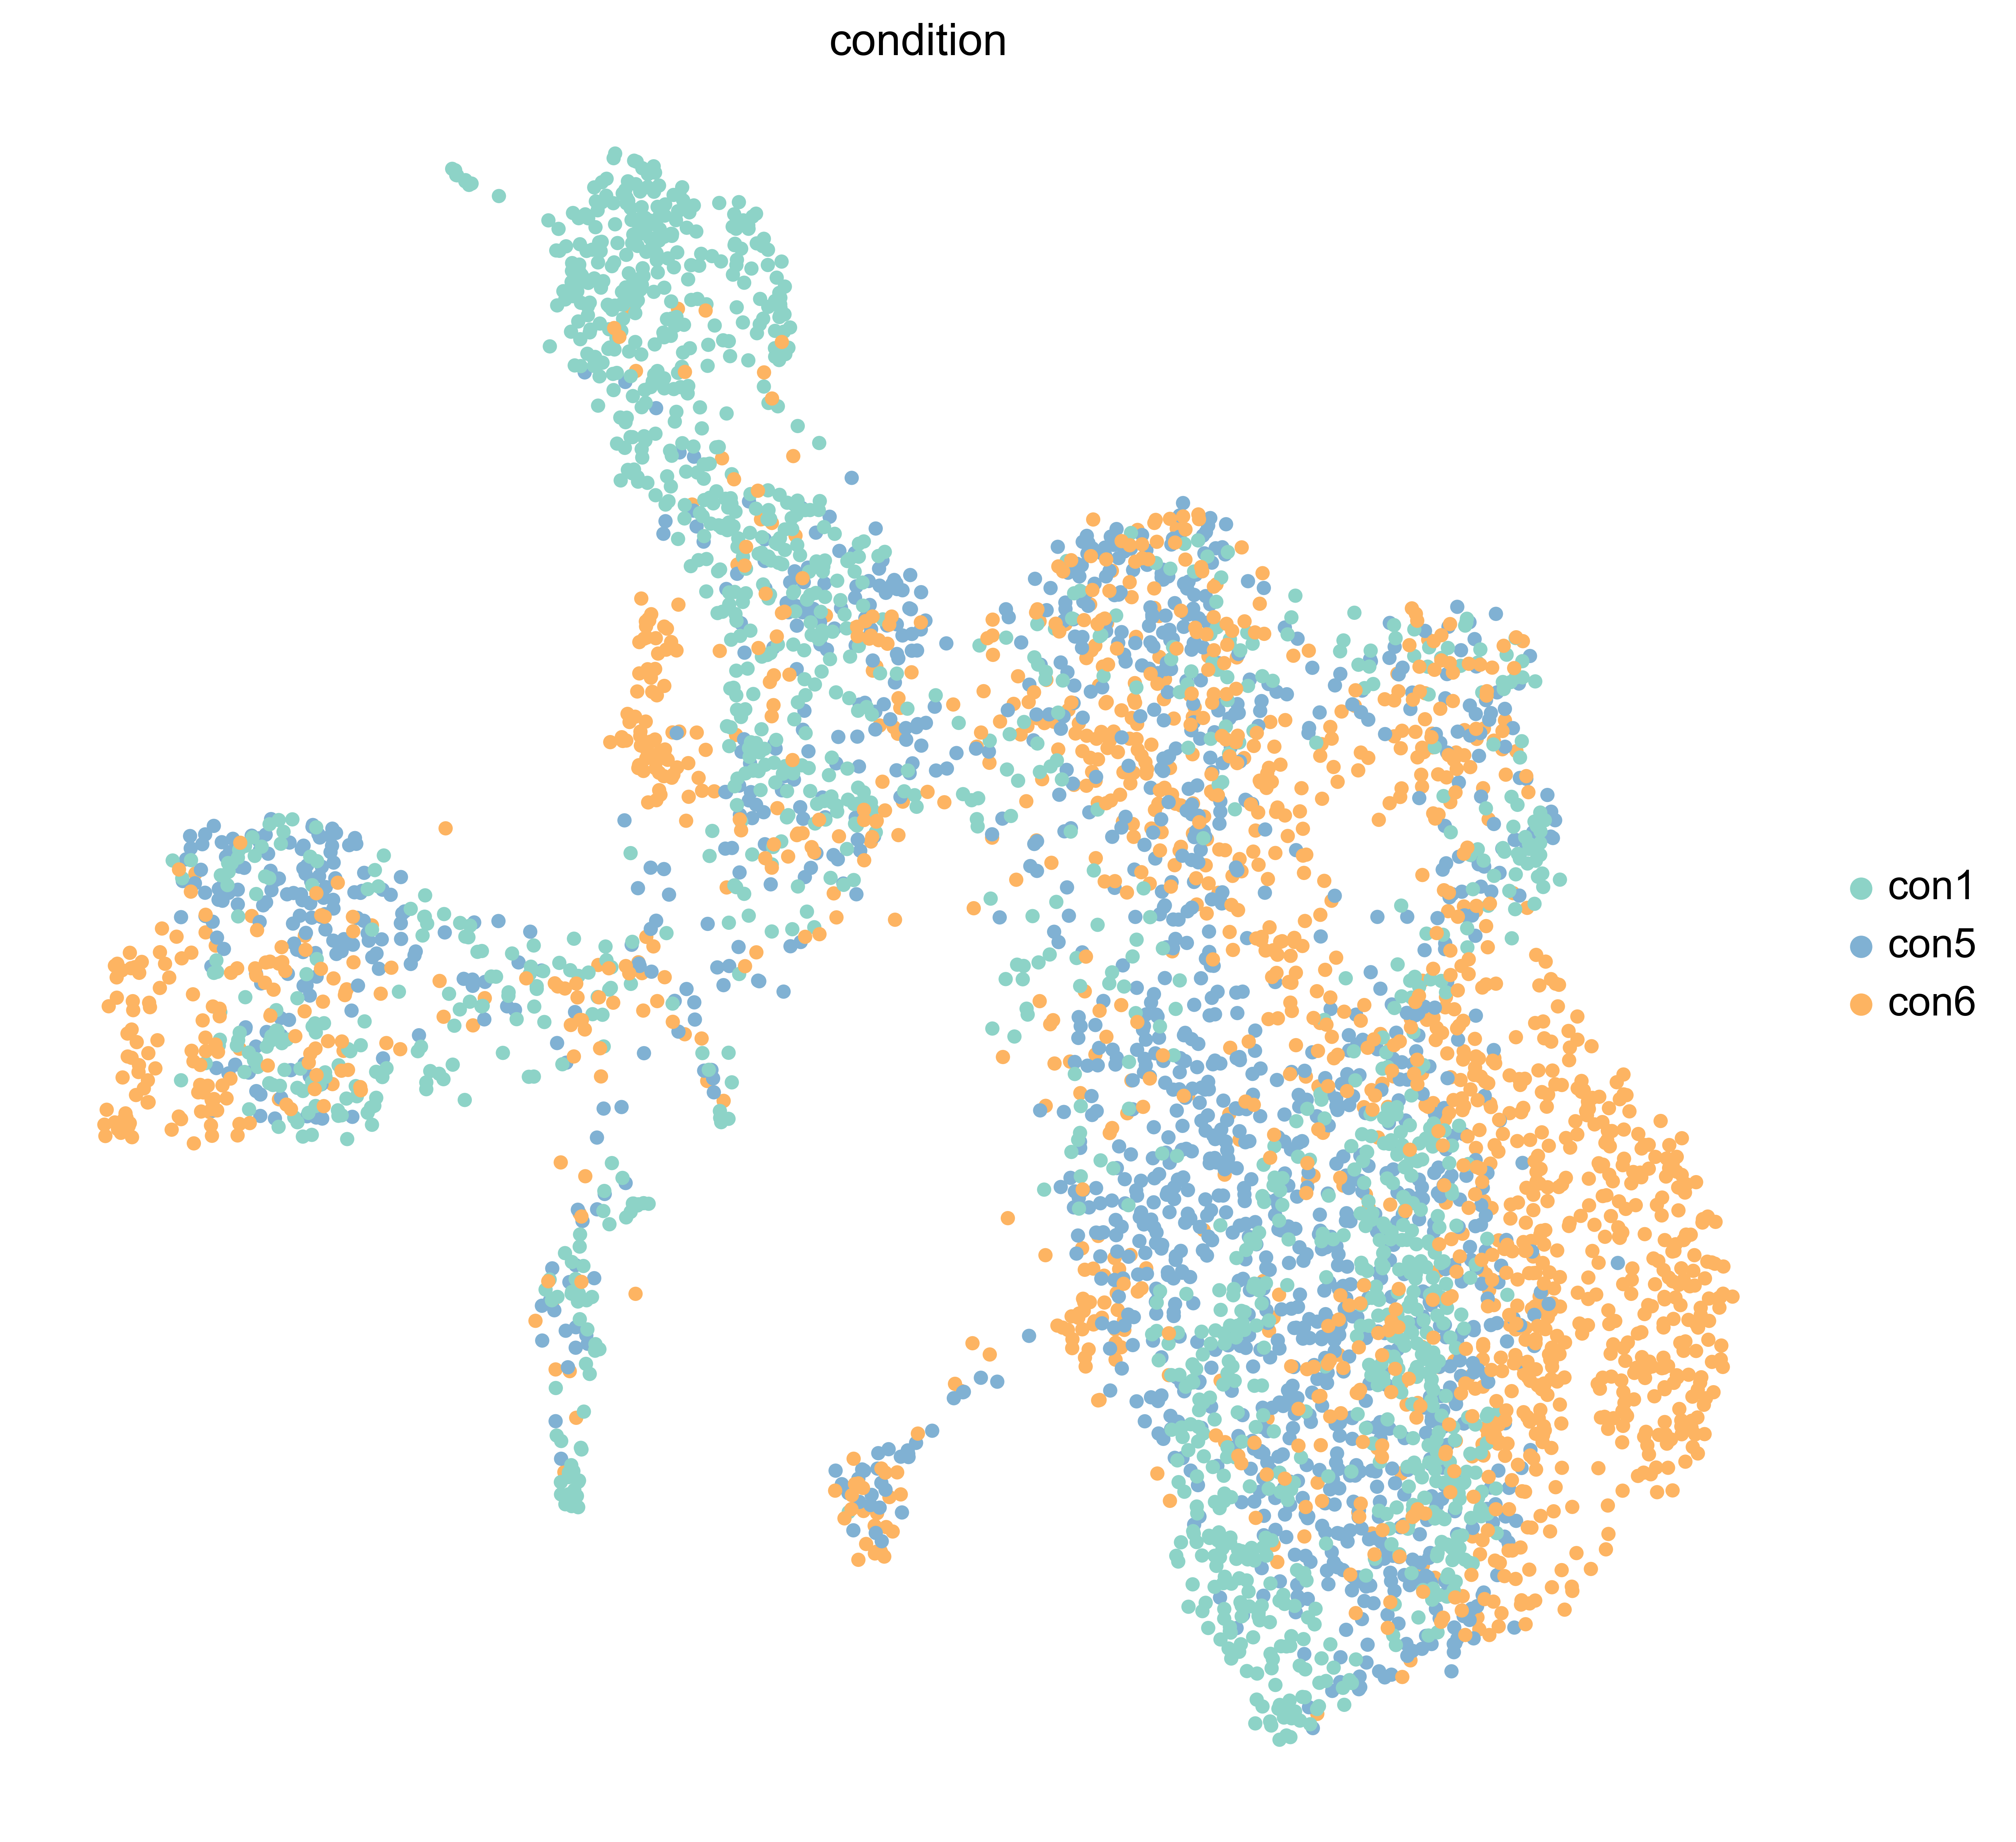

In [161]:
cols =[sns.color_palette("Set3")[0]] + [sns.color_palette("Set3")[4]] + [sns.color_palette("Set3")[5]]
fig, ax = plt.subplots(figsize=(10,10))

ax=sc.pl.umap(adata, color='condition',ax=ax, palette=cols,size=80, frameon = False)

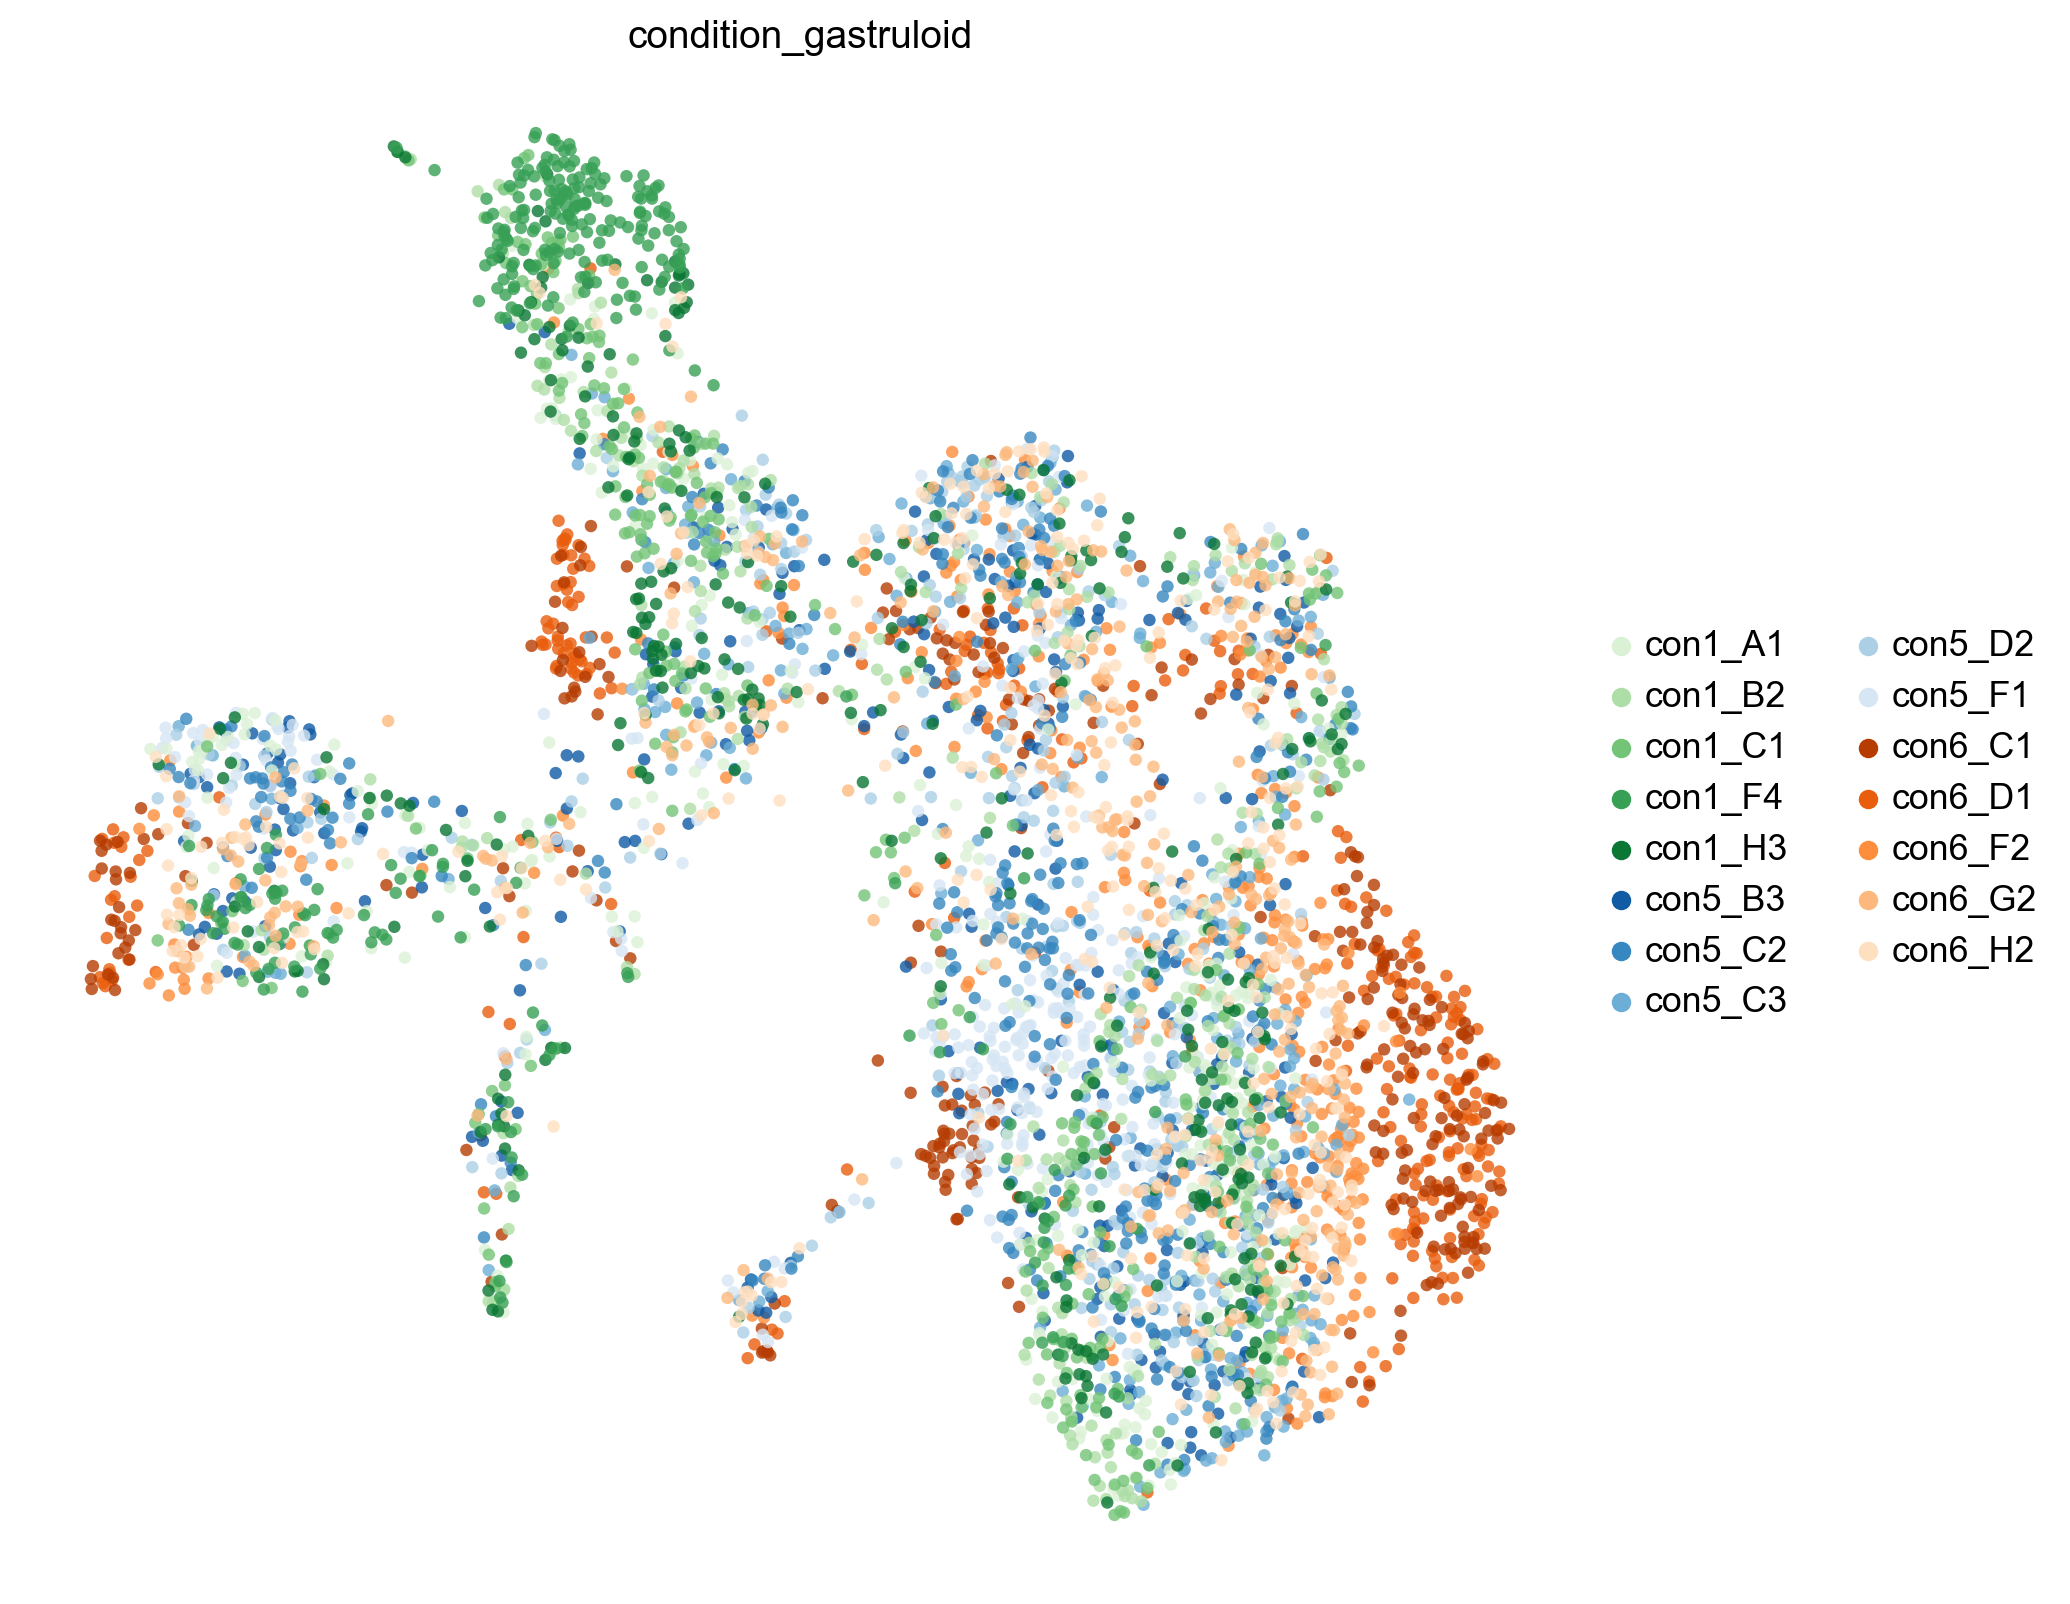

In [10]:
cols2 = sns.color_palette("Greens",5) + sns.color_palette("Blues_r",5)+ sns.color_palette("Oranges_r",5)
fig, ax = plt.subplots(figsize=(10,10))

ax=sc.pl.umap(adata, color='condition_gastruloid',ax=ax, palette=cols2,
              size=80,alpha=0.8, frameon = False)

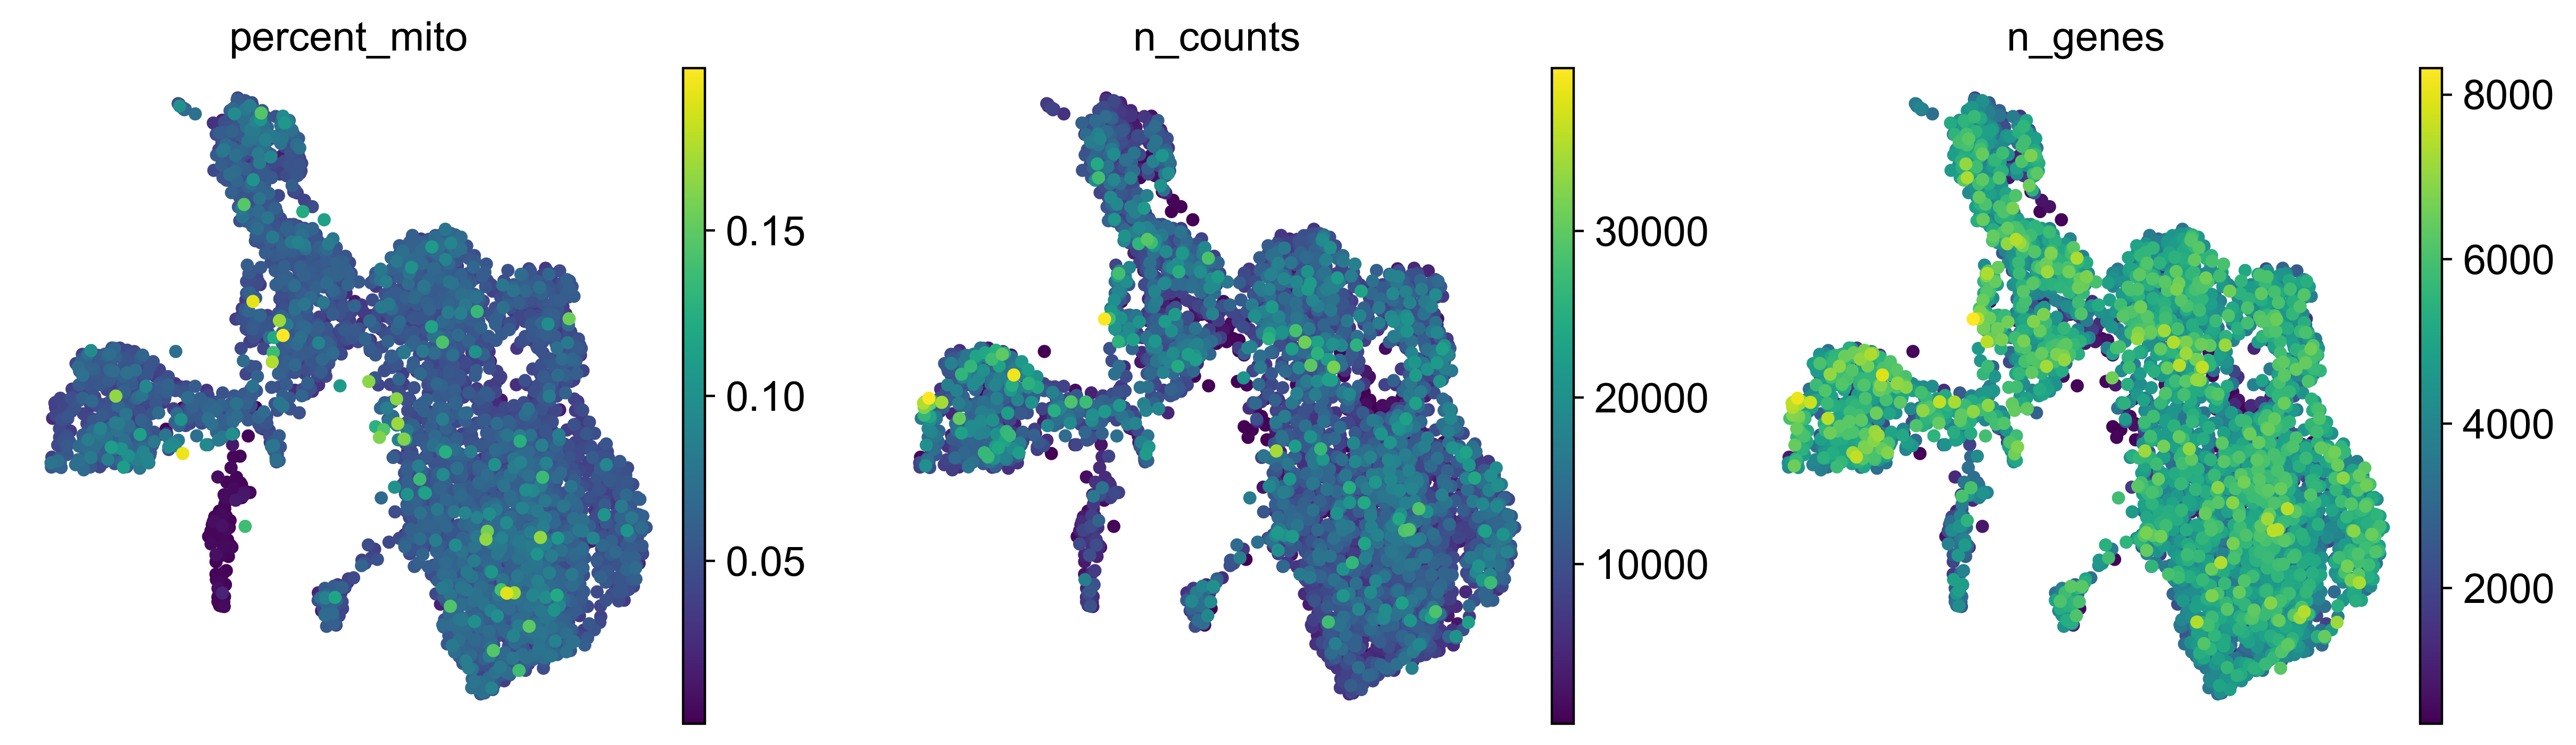

In [69]:
sc.pl.umap(adata, color=['percent_mito','n_counts', 'n_genes'], use_raw=True, 
           frameon=False,size = 80)

As we set the `.raw` attribute of `adata`, the previous plots showed the "raw" (normalized, logarithmized, but uncorrected) gene expression. You can also plot the scaled and corrected gene expression by explicitly stating that you don't want to use `.raw`.

## Clustering the neighborhood graph

As Seurat and many others, we recommend the Louvain graph-clustering method (community detection based on optimizing modularity). It has been proposed for single-cell data by [Levine et al. (2015)](https://doi.org/10.1016/j.cell.2015.05.047). Note that Louvain clustering directly clusters the neighborhood graph of cells, which we already computed in the previous section.

In [ ]:
#sc.tl.louvain(adata)

In [128]:
sc.tl.leiden(adata, resolution = 0.5)

running Leiden clustering
    finished (0:00:00)


Plot the clusters, which agree quite well with the result of Seurat.

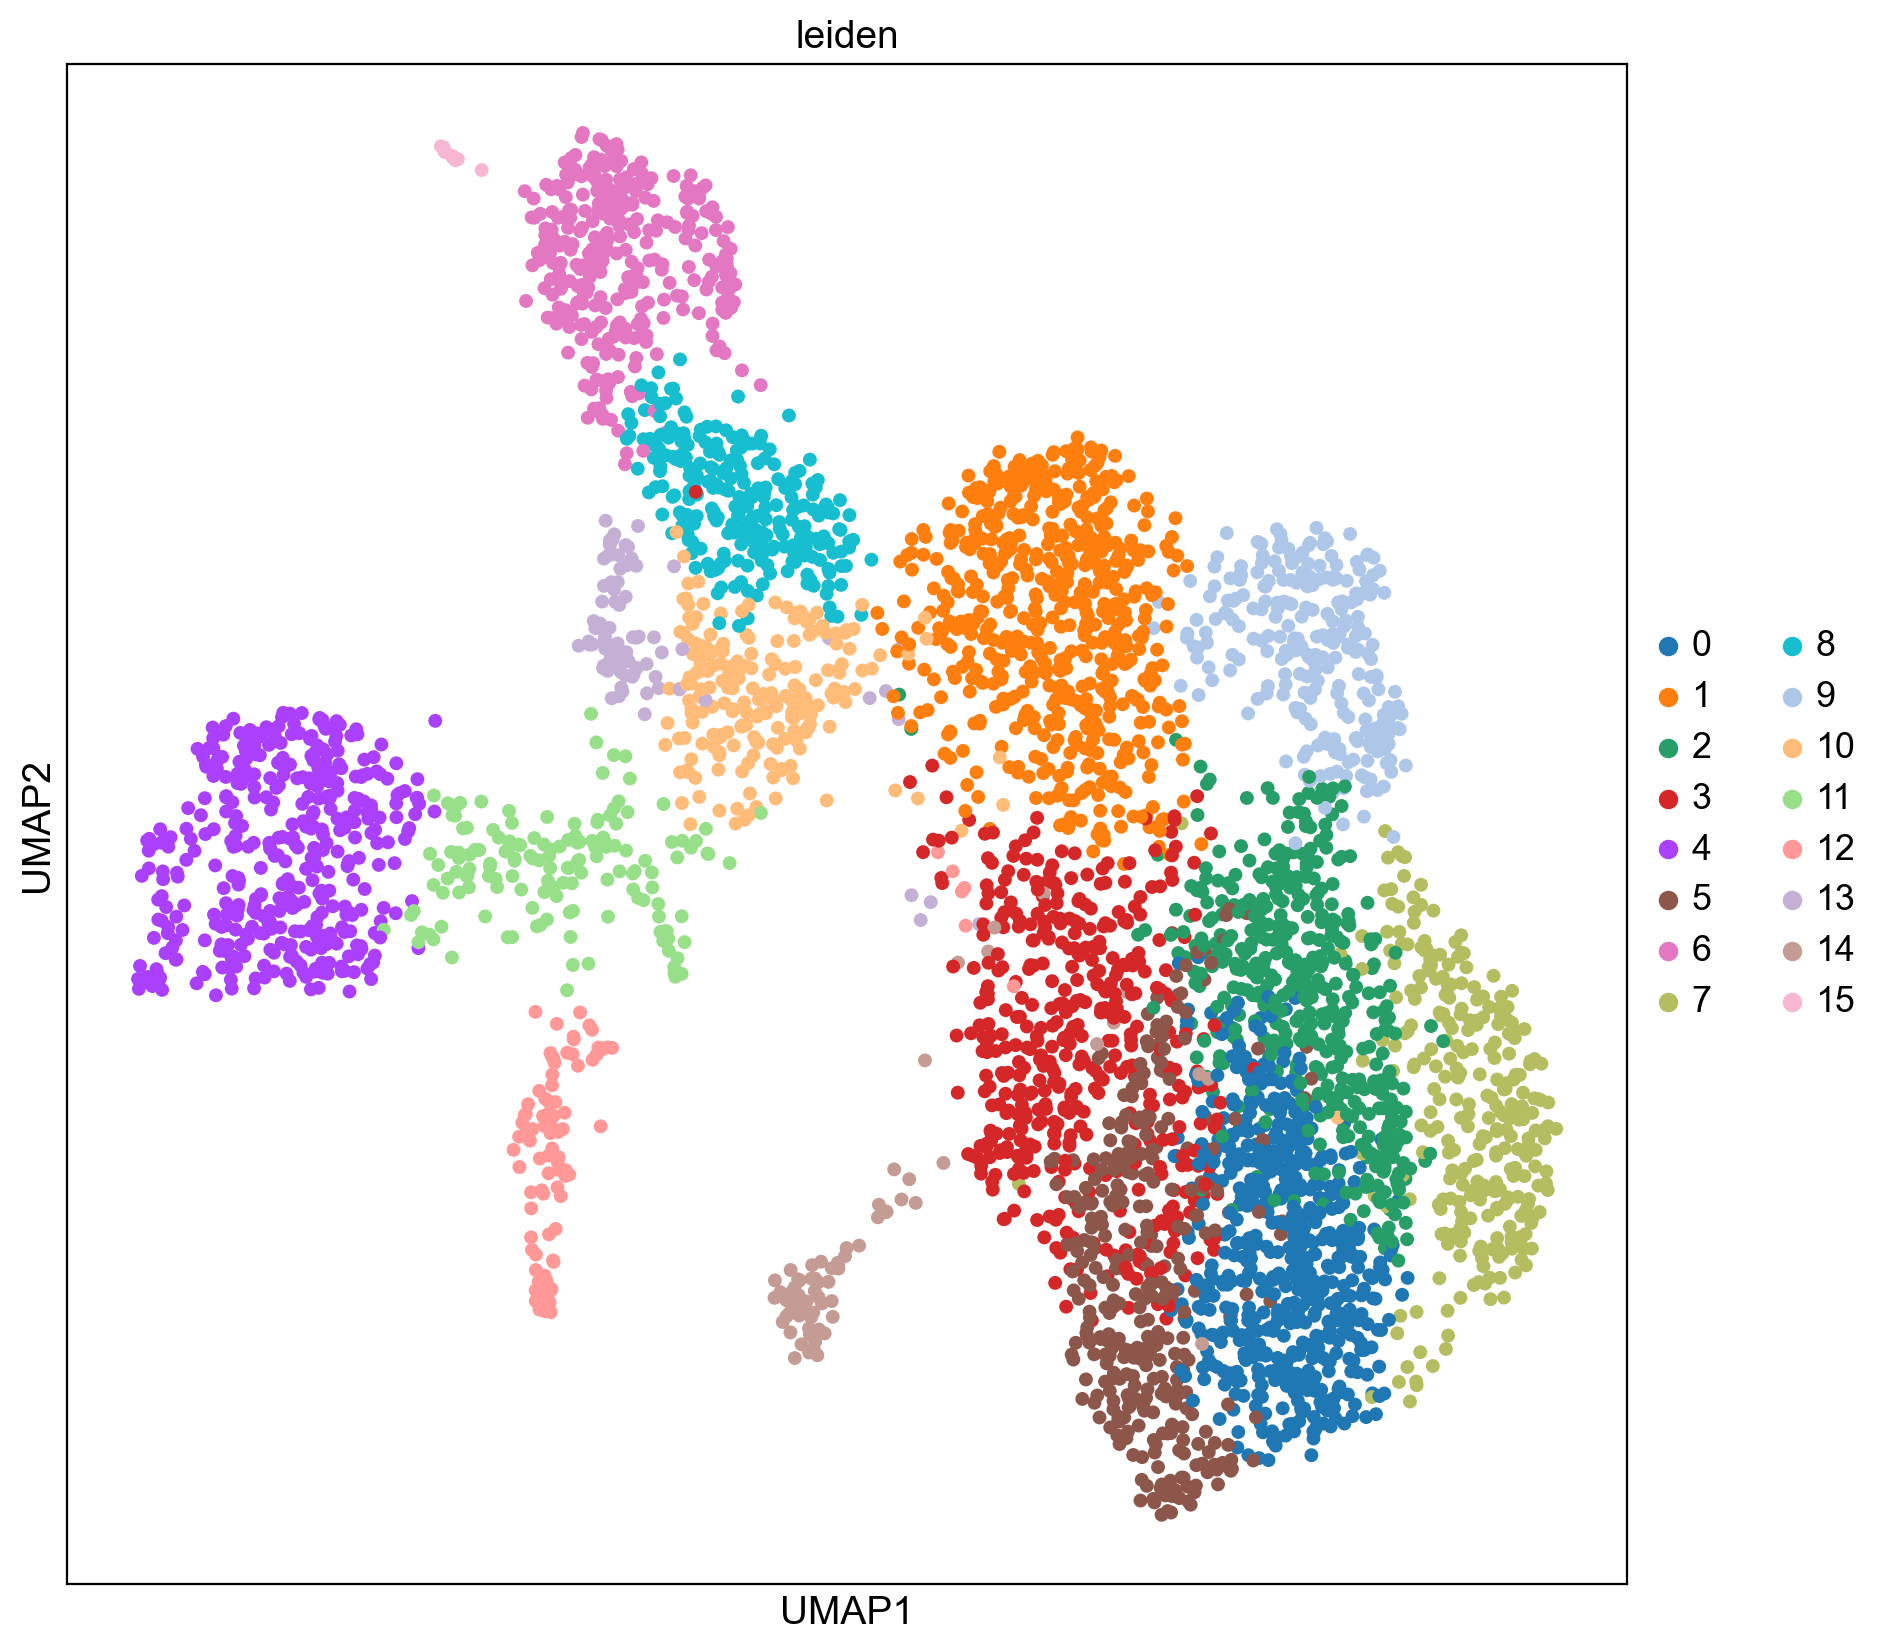

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sc.pl.umap(adata, color='leiden',ax=ax, palette=sc.pl.palettes.default_20,size=100)

Save the result.

In [ ]:
adata.write(results_file)